In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division

In [438]:
data_downsampled = np.genfromtxt('data_sanders_downsampled.csv', delimiter=',')

In [439]:
data_downsampled.shape

(1307, 3)

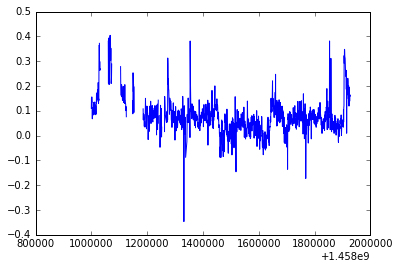

In [440]:
plt.plot(data_downsampled[:,0], data_downsampled[:,1])

In [441]:
%%capture
data = np.genfromtxt('data_sanders_00000.csv', delimiter=',', usecols=(0,1,2), invalid_raise=False, loose=True);

In [442]:
data.shape

(995338, 3)

In [443]:
data[0]

array([  1.45945647e+09,   0.00000000e+00,   7.04857973e+17])

In [444]:
# data = np.array([d for d in data if not d[1] == 0])
# print data.shape                 

# Mode

In [445]:
from scipy.stats import mode

In [446]:
modes = []
tweetids = []
tweets = 0
min_tweets = 100
prev_time = data[0,0]
R = 10*60

for row in data:
    tweets += 1
    if not row[1] == 0:
        tweetids.append(row[2])
    time_diff = float(row[0]) - prev_time
    if time_diff > R:
#         if int(time_diff / R) > 1:
#             modes.append([row[0]-(time_diff*0.5), None, None, None])
        if time_diff > R and tweets > min_tweets:
            m = mode(tweetids)
            modes.append([row[0]-(R*0.5), m[0][0], m[1][0], m[1][0]/len(tweetids), len(tweetids)])
        tweetids = []
        prev_time = float(row[0])
        tweets = 0

In [447]:
np.array(modes).shape

(775, 5)

In [448]:
modes = np.array(modes)

In [450]:
trace = data_downsampled

der_smooth = np.zeros_like(trace)
n = 6
for i in range(len(trace)-n):
    i += n
    der_smooth[i] = np.abs(np.mean(trace[i:i+n], axis=0) - np.mean(trace[i-n:i,1], axis=0))
der_smooth_threshold = 0.2

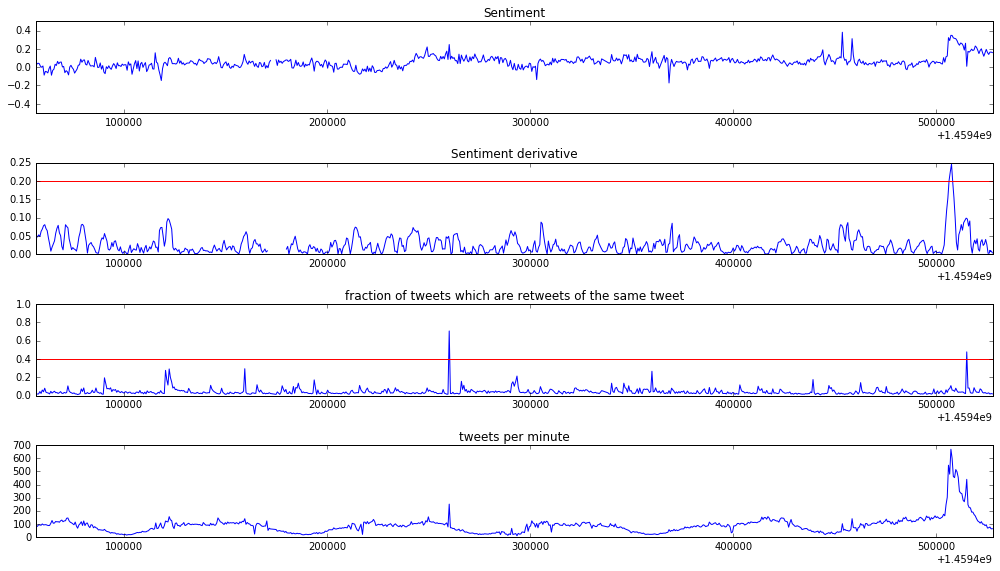

In [451]:
# threshold = np.nanstd(modes[:,3]) * 3
threshold = 0.4

plt.figure(figsize=(14,8))
plt.subplot(411)
plt.title('Sentiment')
plt.plot(data_downsampled[:,0], data_downsampled[:,1])
plt.ylim([-0.5, 0.5])
plt.xlim([data[0,0], data[-1,0]])
plt.subplot(412)
plt.title('Sentiment derivative')
plt.plot(der_smooth[:,0], der_smooth[:,1])
plt.axhline(y=der_smooth_threshold, c='r')
plt.xlim([data[0,0], data[-1,0]])
plt.subplot(413)
plt.title('fraction of tweets which are retweets of the same tweet')
plt.plot(modes[:,0], modes[:,3])
plt.ylim([0,1])
plt.xlim([data[0,0], data[-1,0]])
plt.axhline(y=threshold, c='r')
plt.subplot(414)
plt.title('tweets per minute')
plt.plot(modes[:,0], modes[:,4]/10)
plt.xlim([data[0,0], data[-1,0]])

plt.tight_layout()
plt.show()

In [452]:
peaking = False
for m in modes:
    if not peaking:
        if m[3] > threshold:
            peaking = True
            for y in m:
                print ('%f' % y).rstrip('0').rstrip('.')
            print 'https://twitter.com/statuses/'+str(('%f' % m[1]).rstrip('0').rstrip('.'))
            print
    elif peaking:
        if m[3] < threshold:
            peaking = False

1459660141.22065
716492188939526144
1763
0.7052
2500
https://twitter.com/statuses/716492188939526144

1459914975.939883
717560712332054528
2096
0.476797
4396
https://twitter.com/statuses/717560712332054528



<hr>

In [453]:
peaks = []
peaking = False
start = None
threshold = der_smooth_threshold
for x in der_smooth:
    if not peaking:
        if x[1] > threshold:
            start = x[0]
            peaking = True
    elif peaking:
        if x[1] < threshold:
            end = x[0]
            peaks.append([start, end])
            start = None
            peaking = False
peaks = np.array(peaks)

In [454]:
peaks

array([[  1.45990627e+09,   1.45990807e+09]])

<hr>

In [455]:
b = np.array([d for d in data if not d[1] == 0 and d[0] > peaks[-1,0] - 60*5 and d[0] < peaks[-1,1] + 60*5])

In [456]:
len(b)

22719

In [457]:
from collections import Counter

In [458]:
count = Counter(b[:,1])

In [466]:
x = count.most_common()[:5]
for y in x:
#     print 'https://twitter.com/statuses/'+str(('%f' % y[0]).rstrip('0').rstrip('.'))
    print y

(0.58589999999999998, 6378)
(0.57189999999999996, 5225)
(0.52669999999999995, 564)
(-0.31819999999999998, 562)
(0.2732, 514)


In [467]:
c = np.array([y for y in b if y[1] == x[0][0]])

In [468]:
c.shape

(6378, 3)

In [469]:
common_tweets = Counter(c[:,2]).most_common()[:5]
for x in common_tweets:
    print x
    print 'https://twitter.com/statuses/'+str(('%f' % x[0]).rstrip('0').rstrip('.'))

(7.1752341269291008e+17, 1845)
https://twitter.com/statuses/717523412692910080
(7.1752898028338381e+17, 628)
https://twitter.com/statuses/717528980283383808
(7.1752341204277658e+17, 330)
https://twitter.com/statuses/717523412042776576
(7.1752898029176013e+17, 232)
https://twitter.com/statuses/717528980291760128
(7.1752482039784653e+17, 120)
https://twitter.com/statuses/717524820397846528


<hr>

In [463]:
a = np.array([m for m in modes if m[4]/10 > 50])

In [464]:
len(a)

568

In [465]:
for x in a[-5:]:
    print ('%f' % x[1]).rstrip('0').rstrip('.')
    print 'https://twitter.com/statuses/'+str(('%f' % x[1]).rstrip('0').rstrip('.'))

717522604261838848
https://twitter.com/statuses/717522604261838848
717607438019608576
https://twitter.com/statuses/717607438019608576
717607438019608576
https://twitter.com/statuses/717607438019608576
717609168614645760
https://twitter.com/statuses/717609168614645760
717527336745349120
https://twitter.com/statuses/717527336745349120
